In [1]:
import numpy as np
import pandas as pd
import fix_yahoo_finance as yf  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle
import json

In [2]:
fld='C:/Users/hmxu/Desktop/ML/Stock/'
stockFl=fld+'stock.csv'
modelFl=fld+'stock_Pred_Model_v07190216.pkl'
ivvJson=fld+'stockLatest.json'
columns=['Open','High','Low','Close','Adj Close','Volume','past1','past2','past3','past4','past6','past8','past10','past15','past20','past50','past100','fut']
drop_col=['Adj Close','past1','past2','past3','past4','past6','past8','past10','past15','past20','past50','past100','d11']
feat=list([1,2,3,4,6,8,10,15,20,50,100,-1])


In [3]:
#data = yf.download('IVV','2000-01-01','2019-02-14')
# this demo only use IVV data
stock=pd.read_csv(stockFl,index_col=False)

In [4]:
stock = stock.sort_values(by='Date',ascending=True, axis=0)
stock.set_index('Date', inplace=True)
stock.index = pd.to_datetime(stock.index)
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-08,270.350006,272.149994,269.470001,272.130005,272.130005,2909300
2019-02-11,272.839996,273.149994,271.700012,272.279999,272.279999,2770300
2019-02-12,274.059998,276.200012,274.000000,275.820007,275.820007,4285400
2019-02-13,276.720001,277.619995,276.250000,276.660004,276.660004,2994400
2019-02-14,275.440002,277.309998,274.540009,276.029999,276.029999,7148400


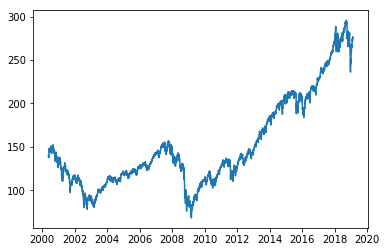

In [5]:
plt.plot(stock['Close'])
plt.show()

In [6]:
shftData=stock.copy()
shftData2=pd.DataFrame(stock['Close'])
for i in feat:
    shftData=pd.concat([shftData,shftData2['Close'].shift(i)],axis=1)
shftData.dropna(axis=0,inplace=True)

In [7]:
shftData.head(3)

,Open,High,Low,Close,Adj Close,Volume,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,,
2000-10-11,137.59375,138.453125,135.3125,136.75000,96.298119,350200,138.00000,140.328125,141.078125,144.281250,142.406250,143.703125,142.703125,144.984375,148.81250,144.062500,140.6875,133.40625
2000-10-12,137.40625,137.500000,132.8125,133.40625,93.943497,155200,136.75000,138.000000,140.328125,141.078125,143.671875,143.875000,146.031250,144.843750,148.43750,144.359375,139.8125,137.37500
2000-10-13,133.15625,137.593750,132.9375,137.37500,96.738228,322200,133.40625,136.750000,138.000000,140.328125,144.281250,142.406250,143.703125,145.250000,146.65625,145.375000,137.6875,138.06250


In [8]:
shftData.columns=columns
shftData.head(3)

,Open,High,Low,Close,Adj Close,Volume,past1,past2,past3,past4,past6,past8,past10,past15,past20,past50,past100,fut
Date,,,,,,,,,,,,,,,,,,
2000-10-11,137.59375,138.453125,135.3125,136.75000,96.298119,350200,138.00000,140.328125,141.078125,144.281250,142.406250,143.703125,142.703125,144.984375,148.81250,144.062500,140.6875,133.40625
2000-10-12,137.40625,137.500000,132.8125,133.40625,93.943497,155200,136.75000,138.000000,140.328125,141.078125,143.671875,143.875000,146.031250,144.843750,148.43750,144.359375,139.8125,137.37500
2000-10-13,133.15625,137.593750,132.9375,137.37500,96.738228,322200,133.40625,136.750000,138.000000,140.328125,144.281250,142.406250,143.703125,145.250000,146.65625,145.375000,137.6875,138.06250


In [9]:
# feature engineering
for i in range(1,len(feat)):
    cl = 'd'+str(i)
    shftData[cl]=(shftData['Close']-shftData.iloc[:,6+i])/shftData['Close']*100

In [10]:
shftData.head(3)

,Open,High,Low,Close,Adj Close,Volume,past1,past2,past3,past4,...,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11
Date,,,,,,,,,,,,,,,,,,,,,
2000-10-11,137.59375,138.453125,135.3125,136.75000,96.298119,350200,138.00000,140.328125,141.078125,144.281250,...,-3.164991,-5.507313,-4.136197,-5.084552,-4.353291,-6.021481,-8.820841,-5.347349,-2.879342,2.445155
2000-10-12,137.40625,137.500000,132.8125,133.40625,93.943497,155200,136.75000,138.000000,140.328125,141.078125,...,-5.188569,-5.750761,-7.695011,-7.847271,-9.463575,-8.573436,-11.267276,-8.210354,-4.802061,-2.974936
2000-10-13,133.15625,137.593750,132.9375,137.37500,96.738228,322200,133.40625,136.750000,138.000000,140.328125,...,-0.454959,-2.149682,-5.027298,-3.662420,-4.606460,-5.732484,-6.756142,-5.823476,-0.227480,-0.500455


In [11]:
# reverse price change (fut- Close)
shftData['dfu']=shftData['d11']*(-1)
shftData.drop(drop_col, axis=1,inplace=True)
shftData.head()

,Open,High,Low,Close,Volume,fut,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,dfu
Date,,,,,,,,,,,,,,,,,
2000-10-11,137.59375,138.453125,135.312500,136.75000,350200,133.406250,-2.616545,-3.164991,-5.507313,-4.136197,-5.084552,-4.353291,-6.021481,-8.820841,-5.347349,-2.879342,-2.445155
2000-10-12,137.40625,137.500000,132.812500,133.40625,155200,137.375000,-3.443429,-5.188569,-5.750761,-7.695011,-7.847271,-9.463575,-8.573436,-11.267276,-8.210354,-4.802061,2.974936
2000-10-13,133.15625,137.593750,132.937500,137.37500,322200,138.062500,0.454959,-0.454959,-2.149682,-5.027298,-3.662420,-4.606460,-5.732484,-6.756142,-5.823476,-0.227480,0.500455
2000-10-16,137.56250,138.140625,136.781250,138.06250,349600,135.000000,3.372567,0.950656,0.045269,-2.184246,-4.062924,-4.210050,-4.255319,-5.024898,-5.930285,-1.222273,-2.218198
2000-10-17,138.21875,138.343750,134.578125,135.00000,157600,134.765625,-1.759259,1.180556,-1.296296,-3.946759,-6.875000,-5.486111,-5.648148,-8.402778,-9.849537,-2.569444,-0.173611


In [12]:
# more feature engineering
shftData['dayCh']=(shftData['Close']-shftData['Open'])/shftData['Open']*100
shftData['dayHi']=(shftData['High']-shftData['Open'])/shftData['Open']*100
shftData['dayLo']=(shftData['Low']-shftData['Open'])/shftData['Open']*100
shftData.drop(['High'],axis=1,inplace=True)
shftData.drop(['Low'],axis=1,inplace=True)
shftData.drop(['Open'],axis=1,inplace=True)

In [13]:
# create categorical label (future close price up >=1%: 1; down >=1%: -1; else 0)
shftData['label'] =shftData['dfu'].apply(lambda x: -1 if x<=-1 else (1 if x>=1 else  0))
shftData.drop(['dfu'],axis=1,inplace=True)
shftData.drop(['fut'],axis=1,inplace=True)

In [14]:
shftData.head()

,Close,Volume,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,dayCh,dayHi,dayLo,label
Date,,,,,,,,,,,,,,,,
2000-10-11,136.75000,350200,-2.616545,-3.164991,-5.507313,-4.136197,-5.084552,-4.353291,-6.021481,-8.820841,-5.347349,-2.879342,-0.613218,0.624574,-1.657960,-1
2000-10-12,133.40625,155200,-3.443429,-5.188569,-5.750761,-7.695011,-7.847271,-9.463575,-8.573436,-11.267276,-8.210354,-4.802061,-2.911076,0.068228,-3.343189,1
2000-10-13,137.37500,322200,0.454959,-0.454959,-2.149682,-5.027298,-3.662420,-4.606460,-5.732484,-6.756142,-5.823476,-0.227480,3.168270,3.332551,-0.164281,0
2000-10-16,138.06250,349600,3.372567,0.950656,0.045269,-2.184246,-4.062924,-4.210050,-4.255319,-5.024898,-5.930285,-1.222273,0.363471,0.420264,-0.567924,-1
2000-10-17,135.00000,157600,-1.759259,1.180556,-1.296296,-3.946759,-6.875000,-5.486111,-5.648148,-8.402778,-9.849537,-2.569444,-2.328736,0.090436,-2.633959,0


In [15]:
# data for training and testing
data=shftData.copy()
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [16]:
# split data
x_train,x_test,y_train, y_test =train_test_split(X,Y,test_size=0.2, random_state=100)

In [17]:
# model tuning
rfc=RandomForestClassifier(random_state=25)
param_grid = { 
    'n_estimators': [60,80,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [18,20,22],
    'criterion' :['gini', 'entropy']
}
randSCV = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, n_iter=100, cv= 3, verbose=2, random_state=42, n_jobs = -1)

randSCV.fit(x_train, y_train)

C:\Users\hmxu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   15.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [60, 80, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [18, 20, 22], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [21]:
# get the best parameters
bestPm=randSCV.best_params_
bestPm

{'n_estimators': 80,
 'max_features': 'auto',
 'max_depth': 22,
 'criterion': 'entropy'}

In [22]:
# set with best parameters
bestCVModel=RandomForestClassifier(n_estimators=80,criterion='entropy',max_depth=22,max_features='auto',random_state=25)
bestCVModel.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=22, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [23]:
print('Accuracy:',bestCVModel.score(x_test, y_test))

Accuracy: 0.7291440953412784


In [24]:
# save model
pickle.dump(bestCVModel, open(modelFl, 'wb'))

In [25]:
# export latest IVV data for Web API testing
latestIVV=data.iloc[-1:,:-1]
latestIVV['symbol']=['IVV']
latestIVV.to_json(ivvJson,orient = "records")
latestIVV

,Close,Volume,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,dayCh,dayHi,dayLo,symbol
Date,,,,,,,,,,,,,,,,
2019-02-13,276.660004,2994400,1.583172,1.637388,1.745831,0.665075,1.792811,2.685604,4.257934,5.331454,0.213257,-6.007372,-0.021681,0.325236,-0.169847,IVV
